<a href="https://colab.research.google.com/github/krakowiakpawel9/ml_course/blob/master/cont/19_k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import plotly.express as px
from sklearn.datasets import make_blobs
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(font_scale=1.5)

In [4]:
data, _ = make_blobs(n_samples=1000, centers=4, cluster_std=1.5, center_box=(-8.0, 8.0), random_state=42)
df = pd.DataFrame(data, columns=['x1', 'x2'])

px.scatter(df, 'x1', 'x2', width=700, height=500, title='Klasteryzacja - Algorytm K-średnich')

In [5]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [6]:
y_kmeans = kmeans.predict(data)
df['y_kmeans'] = y_kmeans
df.head()

,x1,x2,y_kmeans
0,-6.645730,5.470461,1
1,-4.390559,-5.055149,2
2,-4.666211,-5.390080,2
3,3.022862,0.303769,0
4,3.322516,-0.676179,0


In [7]:
px.scatter(df, 'x1', 'x2', 'y_kmeans', width=700, height=500, title='Klasteryzacja - Algorytm K-średnich - 5 klastrów')

In [8]:
wcss = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
    
print(wcss)

[23414.040458695992, 7734.886635126097, 4282.137026938608, 3866.7202023808686, 3444.3012941709762, 3035.837411027436, 2725.044200157285, 2469.353142020336]


In [9]:
wcss = pd.DataFrame(wcss, columns=['wcss'])
wcss = wcss.reset_index()
wcss = wcss.rename(columns={'index': 'clusters'})
wcss['clusters'] += 1
wcss.head()

,clusters,wcss
0,1,23414.040459
1,2,7734.886635
2,3,4282.137027
3,4,3866.720202
4,5,3444.301294


In [10]:
px.line(wcss, x='clusters', y='wcss', width=800, height=500, title='Within-Cluster-Sum of Squared Errors (WCSS)')

In [34]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)

y_kmeans = kmeans.predict(data)
df['y_kmeans'] = y_kmeans

px.scatter(df, 'x1', 'x2', 'y_kmeans', width=700, height=500, title='Klasteryzacja - Algorytm K-średnich')

In [24]:
kmeans.cluster_centers_[:, 0]

array([-4.67830594, -5.30241342,  3.63034824])

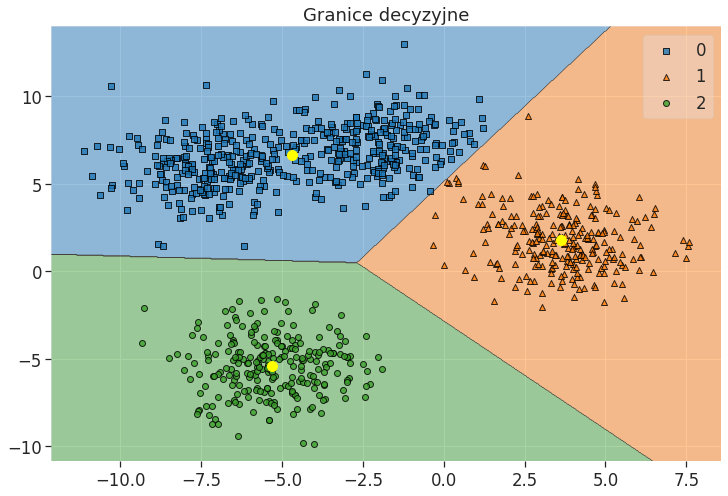

In [35]:
plt.figure(figsize=(12, 8))
plt.title('Granice decyzyjne')
plot_decision_regions(data, y_kmeans, clf=kmeans, legend=1)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='yellow')